<a href="https://colab.research.google.com/github/vadim13213/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%969_%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B8_%D1%80%D0%B0%D0%B7%D0%B2%D0%B5%D1%80%D1%82%D1%8B%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №9. Сравнение моделей классификации изображений и развертывание API**


## **Цель работы**


Провести сравнительный анализ ранее обученных моделей классификации изображений (работы 2-5), выбрать лучшую по метрикам качества, развернуть ее в виде API и создать пользовательский интерфейс с помощью Streamlit.

## **Раздел 1. Подготовка и анализ моделей**


1. Загрузить выбранный датасет для классификации изображений
2. Загрузить ранее обученные модели (из практических работ 2-5)
3. Сравнить модели по метрикам качества:
   - Точность (accuracy)
   - Полнота (recall)
   - Precision
   - F1-мера
   - Время инференса
4. Создать сводный DataFrame с результатами всех моделей
5. Визуализировать результаты сравнения с помощью графиков
6. Построить матрицы ошибок для каждой модели
7. Выбрать лучшую модель по F1-мере
8. Сохранить лучшую модель

### Загрузка и подготовка датасета

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow
from keras.models import load_model
from imutils import paths
import numpy as np
import random
import pickle
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%capture
!unzip /content/drive/MyDrive/datasets/animals.zip -d animals

In [4]:
imagesPath = sorted(list(paths.list_images('/content/animals/')))
random.shuffle(imagesPath)

Загрузка изображений в формате (64, 64, 3)

In [5]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их к нужной размерности.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath, 64)

In [6]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.2, random_state=42)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_test.shape)

(10794, 64, 64, 3)
(8635, 64, 64, 3)
(2159, 64, 64, 3)


Загрузка изображений в формате (64, 64, 3) -> (12288)

In [7]:
def load_flat_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

flat_data, flat_labels = load_flat_images(imagesPath, 64)

In [8]:
flat_data = np.array(flat_data, dtype="float") / 255.0
flat_labels = np.array(flat_labels)

print(flat_data.shape)

(X_train_flat, X_test_flat, Y_train_flat, Y_test_flat) = train_test_split(flat_data, flat_labels, test_size=0.2, random_state=42)

flat_lb = LabelBinarizer()
Y_train_flat = lb.fit_transform(Y_train)
Y_test_flat = lb.transform(Y_test)

print(X_train_flat.shape)
print(X_test_flat.shape)

(10794, 12288)
(8635, 12288)
(2159, 12288)


### Получение метрик для моделей

In [10]:
# Словарь с моделями
models = {
    "simple_dnn(work_№2)": load_model('/content/best_model.h5'),
    "simple_cnn(work_№3)": load_model('/content/best_model_my.keras'),
    "deep_cnn(work_№3)": load_model('/content/best_model_resnet_like.keras'),
    "residual_cnn(work_№4)": load_model('/content/best_model_new.keras'),
    #"tf_resnet50v2(work_№5)": load_model('/content/resnet50v2_best.keras') #модель не удалось найти, но ее результаты все равно не очень хорошие
}

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

results = {}

for name, model in models.items():
    print(f"Получаем метрики для модели {name}")

    if name == "simple_dnn(work_№2)":
        # Оценка модели на тестовом наборе
        test_loss, test_acc = model.evaluate(X_test_flat, Y_test_flat, verbose=0)

        # Получение предсказаний
        y_pred_proba = model.predict(X_test_flat)
        y_pred = np.argmax(y_pred_proba, axis=1)
        y_test = np.argmax(Y_test_flat, axis=1)

    else:
        # Оценка модели на тестовом наборе
        test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)

        # Получение предсказаний
        y_pred_proba = model.predict(X_test)
        y_pred = np.argmax(y_pred_proba, axis=1)
        y_test = np.argmax(Y_test, axis=1)

    # Вычисление метрик
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1': f1,
        'confusion_matrix': cm,
        'test_loss': test_loss,
        'test_acc': test_acc
    }

    print(f"Точность на тестовых данных: {test_acc:.4f}\n")
    print()

Получаем метрики для модели simple_dnn(work_№2)
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
Точность на тестовых данных: 0.3566


Получаем метрики для модели simple_cnn(work_№3)
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step
Точность на тестовых данных: 0.2723


Получаем метрики для модели deep_cnn(work_№3)
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 235ms/step
Точность на тестовых данных: 0.2413


Получаем метрики для модели residual_cnn(work_№4)
68/68 ━━━━━━━━━━━━━━━━━━━━ 28s 409ms/step
Точность на тестовых данных: 0.2492




### Визуализация метрик (сводная таблица с метриками + графики)

Результаты по всем моделям:


,Точность,Полнота,Точность (Precision),F1-мера
simple_dnn(work_№2),0.3566,0.3566,0.3863,0.3557
simple_cnn(work_№3),0.2723,0.2723,0.3474,0.2849
residual_cnn(work_№4),0.2492,0.2492,0.3120,0.2670
deep_cnn(work_№3),0.2413,0.2413,0.3294,0.2616


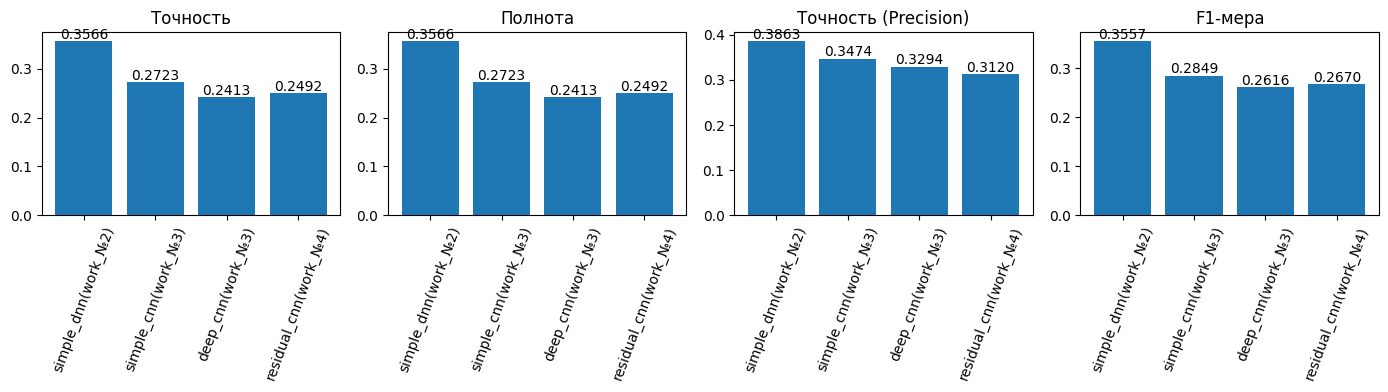

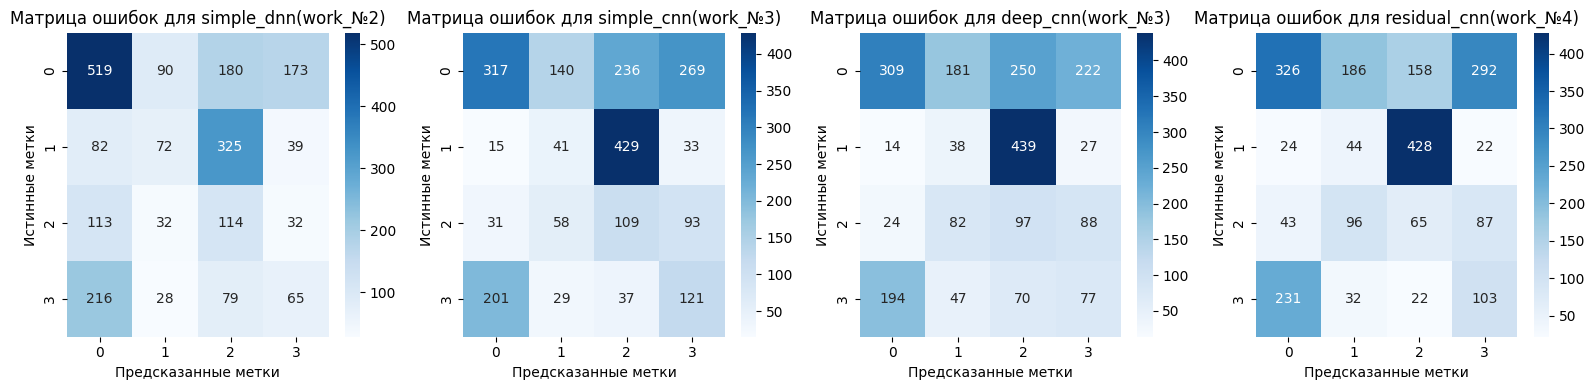


Лучшая модель по F1-мере: simple_dnn(work_№2)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Создание датафрейма с результатами
results_df = pd.DataFrame({
    model_name: {
        'Точность': metrics['accuracy'],
        'Полнота': metrics['recall'],
        'Точность (Precision)': metrics['precision'],
        'F1-мера': metrics['f1'],
    }
    for model_name, metrics in results.items()
})

# Транспонирование для удобного отображения
results_df = results_df.T

# Сортировка по F1-мере
results_df_sorted = results_df.sort_values('F1-мера', ascending=False)

# Вывод результатов
print("Результаты по всем моделям:")
display(results_df_sorted.style.format("{:.4f}"))
print()

# Визуализация метрик
plt.figure(figsize=(14, 6))
metrics_to_plot = ['Точность', 'Полнота', 'Точность (Precision)', 'F1-мера']

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 4, i+1)
    plt.bar(results_df.index, results_df[metric])
    plt.title(metric)
    plt.xticks(rotation=70)
    #plt.ylim([0.9, 1.0])  # Настройка для лучшей визуализации различий

    # Добавление значений к барам
    for j, v in enumerate(results_df[metric]):
        plt.text(j, v + 0.005, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

print()
# Визуализация матриц ошибок
plt.figure(figsize=(16, 4))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(1, 4, i+1)
    cm = metrics['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок для {name}')
    plt.ylabel('Истинные метки')
    plt.xlabel('Предсказанные метки')

plt.tight_layout()
plt.show()

# Выбор лучшей модели по F1-мере
best_model_name = results_df_sorted.index[0]
best_model = models[best_model_name]

print(f"\nЛучшая модель по F1-мере: {best_model_name}")

In [13]:
import joblib

joblib.dump(lb, "label_binarizer.pkl")

['label_binarizer.pkl']

In [18]:
# Сохранение лучшей модели
best_model_name = results_df_sorted.index[0]
best_model = models[best_model_name]
best_model.save('/content/best_model_for_api.h5')  # или .keras

## **Раздел 2. Развертывание API**


1. Создать FastAPI приложение для обработки запросов с изображениями
2. Реализовать предобработку загружаемых изображений
3. Реализовать эндпоинт для классификации изображений
4. Добавить возврат предсказанного класса и вероятностей по всем классам
5. Создать файл requirements.txt с необходимыми зависимостями
6. Развернуть API на сервере с доступом из глобальной сети

preprocess.py

In [43]:
import cv2
import numpy as np
from io import BytesIO
from PIL import Image

def preprocess_image(file, compression_size=64):
    """
    Предобработка загружаемого изображения:
    - читаем байты
    - преобразуем в массив
    - изменяем размер
    - нормализуем

    Returns:
        image (np.array): подготовленное изображение для подачи в модель
    """
    image = Image.open(BytesIO(file)).convert("RGB")
    image = image.resize((compression_size, compression_size))
    image = np.array(image).astype("float32") / 255.0
    image = np.expand_dims(image, axis=0)  # добавляем размерность для batch
    return image

main.py

In [36]:
!pip install fastapi uvicorn nest-asyncio pyngrok


In [39]:
!pip install pyngrok


In [45]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from PIL import Image
import io

def preprocess_image(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = image.convert("RGB")
    image = image.resize((224, 224))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

app = FastAPI()

# Загрузка модели и label binarizer
model = load_model('/content/best_model_for_api.h5')
label_binarizer = joblib.load("label_binarizer.pkl")

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    try:
        image_bytes = await file.read()
        image = preprocess_image(image_bytes)

        # Предсказание
        probs = model.predict(image)[0]  # Вероятности
        predicted_index = np.argmax(probs)
        predicted_label = label_binarizer.classes_[predicted_index]

        return JSONResponse({
            "predicted_class": str(predicted_label),
            "probabilities": {
                str(label): float(prob)
                for label, prob in zip(label_binarizer.classes_, probs)
            }
        })

    except Exception as e:
        return JSONResponse(status_code=500, content={"error": str(e)})

requirements.txt

```
fastapi
uvicorn
numpy
opencv-python-headless
pillow
scikit-learn
joblib
tensorflow
streamlit
streamlit-drawable-canvas
requests
matplotlib
```

## **Раздел 3. Создание интерфейса на Streamlit**



1. Разработать Streamlit-приложение со следующими функциями:
   - Возможность загрузки изображения пользователем
   - Возможность рисования изображения на холсте
   - Предобработка изображения перед отправкой на API
   - Отображение результатов классификации
   - Визуализация распределения вероятностей по классам
2. Развернуть Streamlit-приложение на платформе Streamlit Cloud

app.py

In [20]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.0 MB/s eta 0:00:00


In [47]:
!pip install streamlit-drawable-canvas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.7 MB/s eta 0:00:00


In [48]:
import streamlit as st
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from streamlit_drawable_canvas import st_canvas

# URL до API
API_URL = "https://1122-35-201-175-160.ngrok-free.app/predict/"

# Имена классов
CLASS_NAMES = {
    "0": "cane",
    "1": "cavallo",
    "2": "elefante",
    "3": "scoiattolo"
}

st.title("🐔🐄🐎🐑 Классификация изображений животных")

tab = st.radio("Выберите режим", ["📷 Загрузить изображение", "✏️ Нарисовать изображение"])

image = None

if tab == "📷 Загрузить изображение":
    uploaded_file = st.file_uploader("Загрузите изображение", type=["jpg", "jpeg", "png"])
    if uploaded_file:
        image = Image.open(uploaded_file).convert("RGB")

elif tab == "✏️ Нарисовать изображение":
    st.write("Нарисуйте животное белым цветом на черном фоне:")
    canvas_result = st_canvas(
        fill_color="black",
        stroke_width=10,
        stroke_color="white",
        background_color="black",
        width=256,
        height=256,
        drawing_mode="freedraw",
        key="canvas_draw",
        update_streamlit=True
    )

    if canvas_result.image_data is not None:
        image = Image.fromarray((canvas_result.image_data).astype("uint8")).convert("RGB")

# Отображение изображения
if image:
    st.image(image, caption="Входное изображение", use_container_width=True)

    if st.button("Классифицировать"):
        # Предобработка изображения
        img_resized = image.resize((64, 64))
        buffered = BytesIO()
        img_resized.save(buffered, format="PNG")
        img_bytes = buffered.getvalue()

        # Отправка на API
        files = {"file": ("image.png", img_bytes, "image/png")}
        response = requests.post(API_URL, files=files)

        if response.status_code == 200:
            result = response.json()

            # Предсказанный класс
            class_id = result.get("predicted_class", "unknown")
            class_name = CLASS_NAMES.get(class_id, f"Unknown class: {class_id}")

            st.subheader("✅ Предсказанный класс:")
            st.write(class_name)

            # Вероятности
            raw_probs = result.get("probabilities", {})
            readable_probs = {CLASS_NAMES.get(k, k): v for k, v in raw_probs.items()}

            st.subheader("📊 Распределение вероятностей:")
            fig, ax = plt.subplots()
            ax.bar(readable_probs.keys(), readable_probs.values(), color="skyblue")
            ax.set_ylabel("Вероятность")
            ax.set_ylim([0, 1])
            st.pyplot(fig)
        else:
            st.error("Ошибка при обращении к API:")
            st.text(response.text)

2025-04-27 17:19:23.496 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:19:23.501 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:19:23.626 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-27 17:19:23.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:19:23.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:19:23.631 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:19:23.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [74]:
!pkill streamlit
!pkill ngrok


In [62]:
!nohup streamlit run app.py --server.port 8501 > /dev/null 2>&1 &


In [54]:
!pip install pyngrok


In [72]:
!streamlit run app.py &>/content/logs.txt &


In [73]:
from pyngrok import ngrok

# Убиваем старые туннели
ngrok.kill()

# Открываем новый туннель к порту 8501
public_url = ngrok.connect(8501)
print(public_url)


NgrokTunnel: "https://4320-35-201-175-160.ngrok-free.app" -> "http://localhost:8501"


In [50]:
with open("app.py", "w") as f:
    f.write("""
    [import streamlit as st
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from streamlit_drawable_canvas import st_canvas

# URL до API
API_URL = "https://1122-35-201-175-160.ngrok-free.app/predict/"

# Имена классов
CLASS_NAMES = {
    "0": "cane",
    "1": "cavallo",
    "2": "elefante",
    "3": "scoiattolo"
}

st.title("🐔🐄🐎🐑 Классификация изображений животных")

tab = st.radio("Выберите режим", ["📷 Загрузить изображение", "✏️ Нарисовать изображение"])

image = None

if tab == "📷 Загрузить изображение":
    uploaded_file = st.file_uploader("Загрузите изображение", type=["jpg", "jpeg", "png"])
    if uploaded_file:
        image = Image.open(uploaded_file).convert("RGB")

elif tab == "✏️ Нарисовать изображение":
    st.write("Нарисуйте животное белым цветом на черном фоне:")
    canvas_result = st_canvas(
        fill_color="black",
        stroke_width=10,
        stroke_color="white",
        background_color="black",
        width=256,
        height=256,
        drawing_mode="freedraw",
        key="canvas_draw",
        update_streamlit=True
    )

    if canvas_result.image_data is not None:
        image = Image.fromarray((canvas_result.image_data).astype("uint8")).convert("RGB")

# Отображение изображения
if image:
    st.image(image, caption="Входное изображение", use_container_width=True)

    if st.button("Классифицировать"):
        # Предобработка изображения
        img_resized = image.resize((64, 64))
        buffered = BytesIO()
        img_resized.save(buffered, format="PNG")
        img_bytes = buffered.getvalue()

        # Отправка на API
        files = {"file": ("image.png", img_bytes, "image/png")}
        response = requests.post(API_URL, files=files)

        if response.status_code == 200:
            result = response.json()

            # Предсказанный класс
            class_id = result.get("predicted_class", "unknown")
            class_name = CLASS_NAMES.get(class_id, f"Unknown class: {class_id}")

            st.subheader("✅ Предсказанный класс:")
            st.write(class_name)

            # Вероятности
            raw_probs = result.get("probabilities", {})
            readable_probs = {CLASS_NAMES.get(k, k): v for k, v in raw_probs.items()}

            st.subheader("📊 Распределение вероятностей:")
            fig, ax = plt.subplots()
            ax.bar(readable_probs.keys(), readable_probs.values(), color="skyblue")
            ax.set_ylabel("Вероятность")
            ax.set_ylim([0, 1])
            st.pyplot(fig)
        else:
            st.error("Ошибка при обращении к API:")
            st.text(response.text)]
    """)


In [24]:
!pip install fastapi uvicorn nest_asyncio pyngrok python-multipart


## **Раздел 4. Документация и публикация проекта**


1. Создать GitHub-репозиторий со структурой:
   - Модели (сохраненная лучшая модель)
   - API (код и зависимости)
   - Интерфейс (код Streamlit-приложения)
   - Документация (README.md)
   - Требования (requirements.txt)
2. Добавить в README.md:
   - Описание проекта и используемого датасета
   - Описание сравниваемых моделей
   - Таблицу с результатами сравнения моделей
   - Визуализации результатов
   - Инструкции по локальному развертыванию
   - Ссылки на развернутый API и Streamlit-приложение
   - Примеры использования API
3. Предоставить ссылки на:
   - GitHub-репозиторий
   - Публичный API для отправки POST-запросов
   - Streamlit-интерфейс для взаимодействия с моделью

### ВАШИ ССЫЛКИ

- **GitHub-репозиторий:** https://github.com/Poziloi/chicken_cow_horse_sheep-classification

- **Публичный API для отправки POST-запросов:** https://chicken-cow-horse-sheep-classification.onrender.com

- **Streamlit-интерфейс для взаимодействия с моделью:** https://chicken-cow-horse-sheep-classification.streamlit.app/
